<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/DecisionTree%2CRandomForest/Ensemble(KNN%2CDecisionTree%2CRandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)
- 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
- 앙상블에는 크게 두가지 종류가 존재
 - 평균 방법
   - 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
   - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임 V(X+Y)=V(X)+V(Y)+E(2XY)
 -부스팅 방법
   - 순차적으로 모델 생성
   - 결합된 모델의 편향을 감소 시키기 위해 노력
   - 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축 하는 것. 

# Bagging meta-estimator
  - Bagging 은 `bootstrap aggregating`의 줄임말
  - 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
  - 각각의 결과를 결합해 최종 결과를 생성
  - 분산을 줄이고 과적합을 막음
  - 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#Bagging을 사용한 분류

## 데이터셋 불러오기

In [30]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
boston = load_boston()

##KNN

### 붓꽃 데이터

In [6]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(),
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data,
    y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0012140274047851562 (+/- 0.0003390498632356202)
avg score time: 0.0036160945892333984 (+/- 0.0024532528394255525)
avg test score: 0.96 (+/- 0.024944382578492935)


In [10]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data,
    y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.01835494041442871 (+/- 0.002673682819773216)
avg score time: 0.007066011428833008 (+/- 0.0003092631782053209)
avg test score: 0.9466666666666667 (+/- 0.026666666666666658)


### 와인 데이터

In [12]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(),
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [13]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data,
    y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0015332698822021484 (+/- 0.0005626288093344143)
avg score time: 0.0027176380157470704 (+/- 0.0009070951053578777)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [15]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data,
    y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.017566394805908204 (+/- 0.0010867731383410572)
avg score time: 0.0073391437530517575 (+/- 0.0003227283979595271)
avg test score: 0.9722222222222221 (+/- 0.03513641844631534)


## Decision Tree

### 붓꽃 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(),
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data,
    y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.001455831527709961 (+/- 0.0009285985192895726)
avg score time: 0.0003937721252441406 (+/- 8.799959669244893e-05)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data,
    y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.022136640548706055 (+/- 0.0015691482324303558)
avg score time: 0.0021617889404296877 (+/- 9.236866242038931e-06)
avg test score: 0.9400000000000001 (+/- 0.03265986323710903)


### 와인 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(),
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data,
    y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0026106834411621094 (+/- 0.00039205535488733327)
avg score time: 0.0006849288940429688 (+/- 0.00017461334006230018)
avg test score: 0.8931746031746032 (+/- 0.0541816509305139)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data,
    y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.024959850311279296 (+/- 0.002479132274512046)
avg score time: 0.0024617195129394533 (+/- 0.00046457080724694277)
avg test score: 0.95 (+/- 0.04444444444444447)


#Bagging을 사용한 회귀

## KNN

### 보스턴 주택 가격 데이터

In [38]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(),
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [39]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data,
    y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0015913963317871094 (+/- 0.0004152579422867035)
avg score time: 0.002172517776489258 (+/- 0.0010017741723717692)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [40]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data,
    y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.01898503303527832 (+/- 0.0022977102184176977)
avg score time: 0.009623289108276367 (+/- 0.0004927715803254459)
avg test score: 0.5254788978839467 (+/- 0.1434061377323084)


## Decision Tree

### 보스턴 주택 가격 테이터

In [41]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(),
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples= 0.5, max_features=0.5)

In [42]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data,
    y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.00546560287475586 (+/- 0.0025175199687997698)
avg score time: 0.0007896900177001953 (+/- 0.00027405206699888696)
avg test score: 0.11248819275855308 (+/- 0.94837454953552)


In [43]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data,
    y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.031165456771850585 (+/- 0.004134475125357559)
avg score time: 0.0026917457580566406 (+/- 0.0003764620153404985)
avg test score: 0.5590768713606544 (+/- 0.17343166391796058)


# RandomForest
- **`sklearn.ensemble`** 모듈에는 무작위 결정 트리를 기반으로 하는 두개의 평균화 알고리즘이 존재
 - Random Forest
 - Extra-Trees
- 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
- 앙상블 모델의 예측은 각 모델의 평균

In [44]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## Random Forest 분류

### 붓꽃 데이터

In [45]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(),
)

In [46]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data,
    y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.12610745429992676 (+/- 0.006211741146104642)
avg score time: 0.008089971542358399 (+/- 0.0007853302347841046)
avg test score: 0.96 (+/- 0.024944382578492935)


### 와인 데이터

In [47]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data,
    y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.13217530250549317 (+/- 0.002045968276965793)
avg score time: 0.007731008529663086 (+/- 7.978048549842563e-05)
avg test score: 0.9722222222222221 (+/- 0.024845199749997673)


## Random Forest 회귀

### 보스턴 주택 가격 데이터

In [49]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(),
)

In [51]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data,
    y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.31279721260070803 (+/- 0.004433980620047469)
avg score time: 0.007820367813110352 (+/- 0.00020031871695687332)
avg test score: 0.626736116669529 (+/- 0.20765046649422275)


## Random Forest 시각화
 - 결정트리, Random Forest의 결정 경계와 회귀식 시각화

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [81]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [90]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators=n_estimators)]

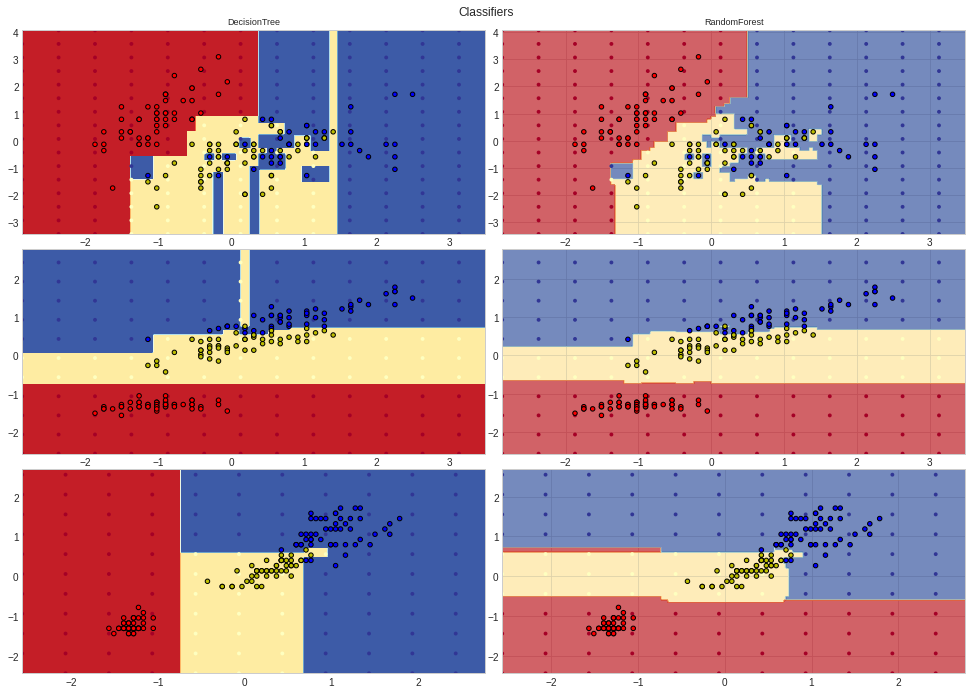

In [91]:
plt.figure(figsize=(14,10))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:

    X = iris.data[:,pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean)/ std 

    model.fit(X,y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    plt.subplot(3,2,plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha,cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0],X[:,1], c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k', s=20)
    plot_idx += 1
  
plt.suptitle("Classifiers",fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad= 2.5)
plt.show()

In [87]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators=n_estimators)]

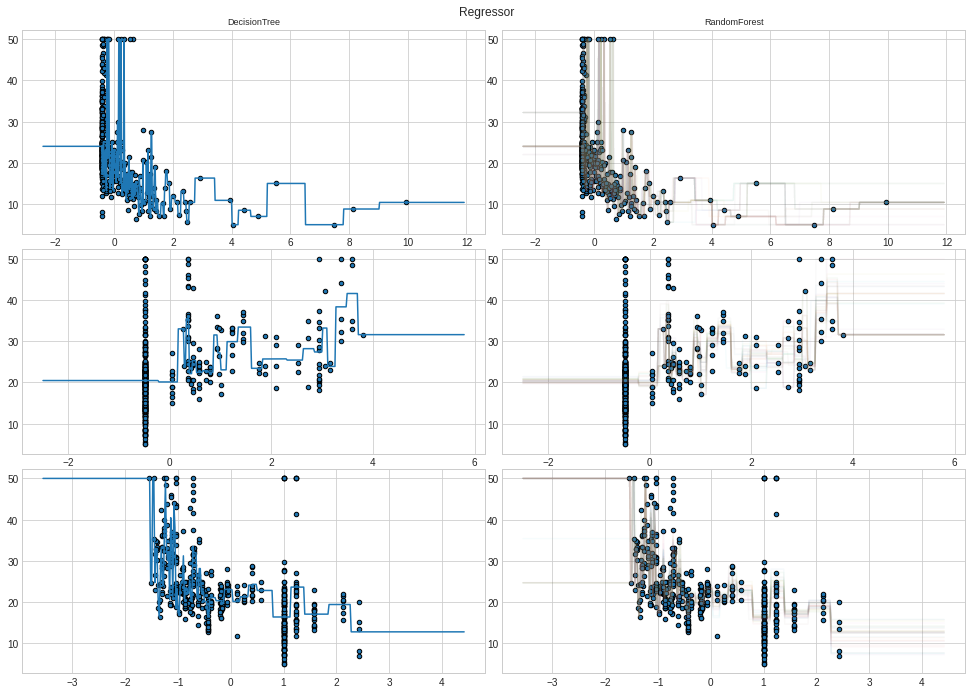

In [88]:
plt.figure(figsize=(14,10))

for pair in (0,1,2):
  for model in models:

    X = boston.data[:,pair]
    y = boston.target
    
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean)/ std 

    model.fit(X.reshape(-1,1),y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]

    plt.subplot(3, 2, plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
    
    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx,Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z, alpha = estimator_alpha )

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle("Regressor",fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad= 2.5)
plt.show()